In [1]:
import pandas as pd
import scipy.stats

C:\Users\cwpoo\AppData\Local\Temp\ipykernel_30924\2011860897.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This dataset contains independent expenditures in the years 2023 and 2024. 

An independent expenditure is an expenditure for a communication that expressly advocates the election or defeat of a clearly identified candidate and which is not made in coordination with any candidate or their campaign or political party. 

Essentially, it's a donation by a person or organization to a political candidate with whom they have no ties.

First, let's clean the dataset a little. There are many columns that are either unneeded for the analyses we will run or mostly blank.

In [2]:
df = pd.read_csv("independent_expenditures_2023-2024.csv")
columns_to_keep = ['committee_id', 'committee_name', 'report_year', 'report_type', 'payee_name', 'payee_city', 'payee_state', 'expenditure_date', 'expenditure_amount', 'office_total_ytd', 'category_code_full', 'support_oppose_indicator', 'candidate_id', 'candidate_name', 'candidate_first_name', 'candidate_last_name', 'candidate_office', 'candidate_office_state', 'candidate_party', 'election_type']
df = df.drop(columns=df.columns.difference(columns_to_keep))
df.head()

C:\Users\cwpoo\AppData\Local\Temp\ipykernel_30924\3697287570.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("independent_expenditures_2023-2024.csv")


,committee_id,committee_name,report_year,report_type,payee_name,payee_city,payee_state,expenditure_date,expenditure_amount,office_total_ytd,category_code_full,support_oppose_indicator,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_office,candidate_office_state,candidate_party,election_type
0,C00725820,THE LINCOLN PROJECT,2023,48,MANHATTAN CREATIVE GROUP,DENVER,CO,2023-09-29 00:00:00,4958.33,7642.33,NaN,O,P80001571,"TRUMP, DONALD J.",DONALD,TRUMP,P,NY,REP,P2024
1,C00825851,MAKE AMERICA GREAT AGAIN INC.,2024,24,ELECTORAL COMMUNICATIONS GROUP LLC,TAMPA,FL,2024-01-05 00:00:00,9329.47,3790126.22,NaN,O,P60008521,"CHRISTIE, CHRIS",CHRIS,CHRISTIE,P,NH,REP,P2024
2,C00828061,"SFA FUND, INC",2023,48,FIVE SEASONS MEDIA,CEDAR RAPIDS,IA,2023-10-18 00:00:00,10000.00,12020052.69,Advertising Expenses,S,P40010977,"HALEY, NIKKI",NIKKI,HALEY,P,IA,REP,P2024
3,C00828061,"SFA FUND, INC",2023,48,TARGET ENTERPRISES LLC,LOS ANGELES,CA,2023-09-20 00:00:00,736000.00,10105852.69,Advertising Expenses,S,P40010977,"HALEY, NIKKI",NIKKI,HALEY,P,IA,REP,P2024
4,C00855213,SOUTH ALABAMA CONSERVATIVES PAC,2024,24,SR COMMUNICATION,BIRMINGHAM,AL,2024-02-20 00:00:00,8500.00,719764.00,Advertising Expenses,O,H8AL02171,"MOORE, FELIX BARRY",FELIX BARRY,MOORE,H,AL,REP,P2024


Next, let's only consider expenditures to candidates who are running for the 2024 presidency.

In [3]:
df = df[(df['candidate_office'] == 'P') & (df['election_type'].str.contains('24'))]
df.head(10)

,committee_id,committee_name,report_year,report_type,payee_name,payee_city,payee_state,expenditure_date,expenditure_amount,office_total_ytd,category_code_full,support_oppose_indicator,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_office,candidate_office_state,candidate_party,election_type
0,C00725820,THE LINCOLN PROJECT,2023,48,MANHATTAN CREATIVE GROUP,DENVER,CO,2023-09-29 00:00:00,4958.33,7642.33,NaN,O,P80001571,"TRUMP, DONALD J.",DONALD,TRUMP,P,NY,REP,P2024
1,C00825851,MAKE AMERICA GREAT AGAIN INC.,2024,24,ELECTORAL COMMUNICATIONS GROUP LLC,TAMPA,FL,2024-01-05 00:00:00,9329.47,3790126.22,NaN,O,P60008521,"CHRISTIE, CHRIS",CHRIS,CHRISTIE,P,NH,REP,P2024
2,C00828061,"SFA FUND, INC",2023,48,FIVE SEASONS MEDIA,CEDAR RAPIDS,IA,2023-10-18 00:00:00,10000.00,12020052.69,Advertising Expenses,S,P40010977,"HALEY, NIKKI",NIKKI,HALEY,P,IA,REP,P2024
3,C00828061,"SFA FUND, INC",2023,48,TARGET ENTERPRISES LLC,LOS ANGELES,CA,2023-09-20 00:00:00,736000.00,10105852.69,Advertising Expenses,S,P40010977,"HALEY, NIKKI",NIKKI,HALEY,P,IA,REP,P2024
13,C00825851,MAKE AMERICA GREAT AGAIN INC.,2023,48,DEL RAY MEDIA LLC,ALEXANDRIA,VA,2023-10-04 00:00:00,468460.00,24106287.37,NaN,S,P80001571,"TRUMP, DONALD J.",DONALD J.,TRUMP,P,IA,REP,P2024
18,C00863084,GOOD FIGHT,2024,24,TAG LLC,ALEXANDRIA,VA,2024-01-05 00:00:00,1000.00,3229900.00,NaN,O,P80000722,"BIDEN, JOSEPH R JR",JOSEPH,BIDEN,P,IA,DEM,P2024
20,C00840546,TRUST IN THE MISSION PAC,2023,48,FIELD FORWARD,COLUMBIA,SC,2023-07-17 00:00:00,452200.00,454250.00,NaN,S,P40012155,"SCOTT, TIMOTHY E.",TIMOTHY,SCOTT,P,SC,REP,P2024
22,C00828061,"SFA FUND, INC",2023,48,SHIRE STRATEGIES LLC,PITTSBURGH,PA,2023-07-27 00:00:00,31120.80,2852352.61,Advertising Expenses,S,P40010977,"HALEY, NIKKI",NIKKI,HALEY,P,IA,REP,P2024
26,C00801803,SOS AMERICA PAC,2023,48,"HARRIS MEDIA, LLC",MIAMI,FL,2023-07-20 00:00:00,125.18,514.31,Advertising Expenses,S,P40013765,"SUAREZ, FRANCIS X. X.",FRANCIS X.,SUAREZ,P,CT,REP,P2024
27,C00801803,SOS AMERICA PAC,2023,48,"HARRIS MEDIA, LLC",MIAMI,FL,2023-07-20 00:00:00,2.33,28.83,Advertising Expenses,S,P40013765,"SUAREZ, FRANCIS X. X.",FRANCIS X.,SUAREZ,P,DC,REP,P2024


Next, let's make a new dataframe containing all the candidates and their party.

In [4]:
presidential_candidates = df[df['election_type'] == 'P2024'][['candidate_id', 'candidate_name', 'candidate_first_name', 'candidate_last_name', 'candidate_party']]
presidential_candidates = presidential_candidates.drop_duplicates(subset=['candidate_id'])
presidential_candidates

,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_party
0,P80001571,"TRUMP, DONALD J.",DONALD,TRUMP,REP
1,P60008521,"CHRISTIE, CHRIS",CHRIS,CHRISTIE,REP
2,P40010977,"HALEY, NIKKI",NIKKI,HALEY,REP
18,P80000722,"BIDEN, JOSEPH R JR",JOSEPH,BIDEN,DEM
20,P40012155,"SCOTT, TIMOTHY E.",TIMOTHY,SCOTT,REP
26,P40013765,"SUAREZ, FRANCIS X. X.",FRANCIS X.,SUAREZ,REP
35,P40011082,"RAMASWAMY, VIVEK",VIVEK,RAMASWAMY,REP
40,NaN,"DESANTIS, RON",RON,DESANTIS,NaN
65,P80005816,"BIDEN, JOSEPH R. JR.",JOSEPH,BIDEN,NaN
85,P40011793,"KENNEDY, ROBERT F JR",ROBERT,KENNEDY,IND


Hmm, looks like there are some duplicates and/or candidates with the party missing. We can't just get rid of them because I've checked that the duplicates do have expenditures associated with their candidate_id. 

Let's impute the party for the candidates who have duplicates that have a missing party.

In [5]:
def fill_in_party_presidential_candidates(row):
    matches = presidential_candidates[(presidential_candidates['candidate_last_name'].str.contains(row['candidate_last_name'])) & 
                                      (presidential_candidates['candidate_first_name'].str[0] == row['candidate_first_name'][0])]

    non_nan_parties = matches['candidate_party'].dropna()
    if not non_nan_parties.empty:
        non_nan_party = non_nan_parties.iloc[0]
        matches['candidate_party'] = matches['candidate_party'].fillna(non_nan_party)
        presidential_candidates.loc[matches.index] = matches


presidential_candidates.apply(fill_in_party_presidential_candidates, axis=1)
presidential_candidates

,candidate_id,candidate_name,candidate_first_name,candidate_last_name,candidate_party
0,P80001571,"TRUMP, DONALD J.",DONALD,TRUMP,REP
1,P60008521,"CHRISTIE, CHRIS",CHRIS,CHRISTIE,REP
2,P40010977,"HALEY, NIKKI",NIKKI,HALEY,REP
18,P80000722,"BIDEN, JOSEPH R JR",JOSEPH,BIDEN,DEM
20,P40012155,"SCOTT, TIMOTHY E.",TIMOTHY,SCOTT,REP
26,P40013765,"SUAREZ, FRANCIS X. X.",FRANCIS X.,SUAREZ,REP
35,P40011082,"RAMASWAMY, VIVEK",VIVEK,RAMASWAMY,REP
40,NaN,"DESANTIS, RON",RON,DESANTIS,REP
65,P80005816,"BIDEN, JOSEPH R. JR.",JOSEPH,BIDEN,DEM
85,P40011793,"KENNEDY, ROBERT F JR",ROBERT,KENNEDY,IND


Now we've filled in any missing party information for the candidates.
Let's apply this to the rows of the expenditure dataframe so we can run some party-specific analyses.

In [6]:
def fill_in_party(row):
    if not row['candidate_party']:
        row['candidate_party'] = presidential_candidates[row['candidate_id']]['candidate_party']

df.apply(fill_in_party, axis=1)

0        None
1        None
2        None
3        None
13       None
         ... 
11311    None
11317    None
11321    None
11322    None
11323    None
Length: 4190, dtype: object

Now let's take a look at the total amount of money that was spent supporting and opposing each party.

Democrat support total was $3775188.92
Democrat opposition total was $14458741.44
Republican support total was $153657897.38
Republican opposition total was $75235689.62


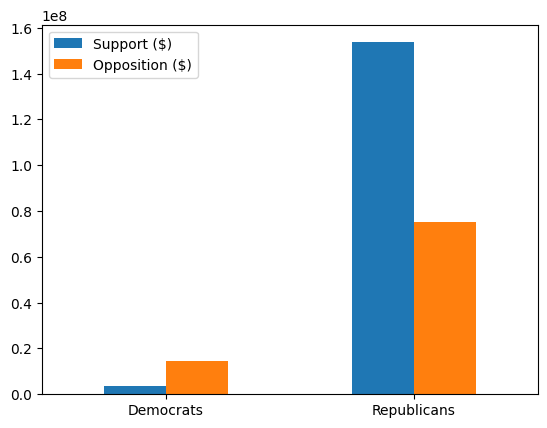

In [7]:
democrat_support_total = df[(df['support_oppose_indicator'] == 'S') & (df['candidate_party'] == 'DEM')]['expenditure_amount'].sum()
democrat_oppose_total = df[(df['support_oppose_indicator'] == 'O') & (df['candidate_party'] == 'DEM')]['expenditure_amount'].sum()
republican_support_total = df[(df['support_oppose_indicator'] == 'S') & (df['candidate_party'] == 'REP')]['expenditure_amount'].sum()
republican_oppose_total = df[(df['support_oppose_indicator'] == 'O') & (df['candidate_party'] == 'REP')]['expenditure_amount'].sum()

support_totals = [democrat_support_total, republican_support_total]
opposition_totals = [democrat_oppose_total, republican_oppose_total]
index = ['Democrats', 'Republicans']
totals = pd.DataFrame({'Support ($)': support_totals, 'Opposition ($)': opposition_totals}, index=index)
totals.plot.bar(rot=0)

print("Democrat support total was $%.2f" % (democrat_support_total))
print("Democrat opposition total was $%.2f" % (democrat_oppose_total))
print("Republican support total was $%.2f" % (republican_support_total))
print("Republican opposition total was $%.2f" % (republican_oppose_total))

Wow, the difference in support between the parties is quite large -- let's investigate.

In [8]:
df[(df['support_oppose_indicator'] == 'S') & (df['candidate_party'] == 'REP')].groupby('candidate_name')['expenditure_amount'].sum().sort_values(ascending=False)

candidate_name
HALEY, NIKKI               85293574.60
BURGUM, DOUG               18724023.22
SCOTT, TIMOTHY E.          16046575.01
TRUMP, DONALD J.           10694716.33
RAMASWAMY, VIVEK            6554190.89
SUAREZ, FRANCIS X. X.       4869326.76
CHRISTIE, CHRISTOPHER J     4817349.53
DESANTIS, RON               4665220.70
HUTCHINSON, W. ASA          1140258.67
HURD, WILLIAM                755197.72
TRUMP, DONALD J               85037.83
SUAREZ, FRANCIS X.            12426.12
Name: expenditure_amount, dtype: float64

In [9]:
df[(df['support_oppose_indicator'] == 'S') & (df['candidate_party'] == 'REP')][['candidate_name', 'expenditure_amount']].sort_values(by='expenditure_amount', ascending=False)

,candidate_name,expenditure_amount
4834,"HALEY, NIKKI",16717500.00
8197,"BURGUM, DOUG",4500029.00
6170,"HALEY, NIKKI",3350000.00
5723,"HALEY, NIKKI",3020350.00
122,"BURGUM, DOUG",2578115.00
...,...,...
6552,"SUAREZ, FRANCIS X. X.",0.11
6404,"SUAREZ, FRANCIS X. X.",0.08
768,"SUAREZ, FRANCIS X. X.",0.06
4066,"HALEY, NIKKI",-25018.23


Hmm, ok, looks fine -- no crazy outliers or anything. 

Fun fact, in this dataset there's a $6.3 billion expenditure to a candidate named "Amandra Bounnharat" made by the committee "Republican Emo Girl." I wonder how that snuck into this dataset, because that clearly has to be fake.

Ratio of independent Republican support dollars to independent Democrat support dollars is 40.7
Ratio of independent Republican opposition dollars to independent Democrat opposition dollars is 5.2


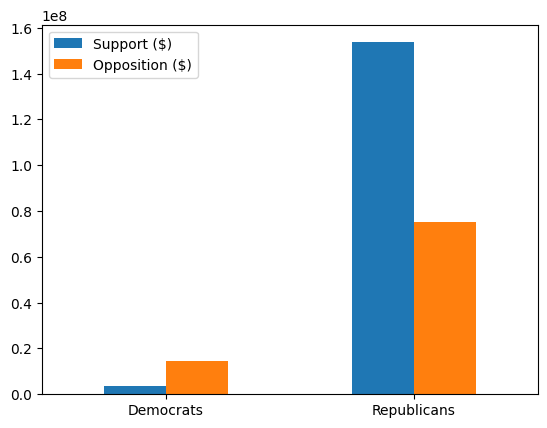

In [10]:
totals.plot.bar(rot=0)
print("Ratio of independent Republican support dollars to independent Democrat support dollars is %.1f" % (republican_support_total / democrat_support_total))
print("Ratio of independent Republican opposition dollars to independent Democrat opposition dollars is %.1f" % (republican_oppose_total / democrat_oppose_total))

## Conclusion 1:
After checking for any other outliers, we have the above bar chart. As we can see, much more money is spent with regards to Republican presidential candidates than Democratic presidential candidates. 

Republicans have 40.7 times the independent support dollars as Democrats. 

Republicans have 5.2 times the independent opposition dollars as Democrats. 

This chart helps illustrate the fact that there is a lot of competition within the Republican party to become the nominee, which results in many dollars spent both supporting and opposing various Republican candidates. Meanwhile, Joe Biden is all but confirmed as the Democratic nominee, so spending money supporting or opposing Democratic candidates is not particularly productive.

Next, I'm interested to see if the distribution of the expenditure amounts of 24- and 48-hour reports are different or the same. For more information about 24-hour and 48-hour reports, see [this link](https://www.fec.gov/campaign-finance-data/independent-expenditures-file-description/). 

Essentially, 24-hour reports must be reported sooner and have a lower threshold of funds raised before they are required to be reported.

First let's check to see if the expenditure amounts are normally distributed for each report type:

1201    6736839.00
9953    6120000.00
8197    4500029.00
6170    3350000.00
5723    3020350.00
           ...    
6661          0.17
5490          0.13
6552          0.11
6404          0.08
768           0.06
Name: expenditure_amount, Length: 3408, dtype: float64

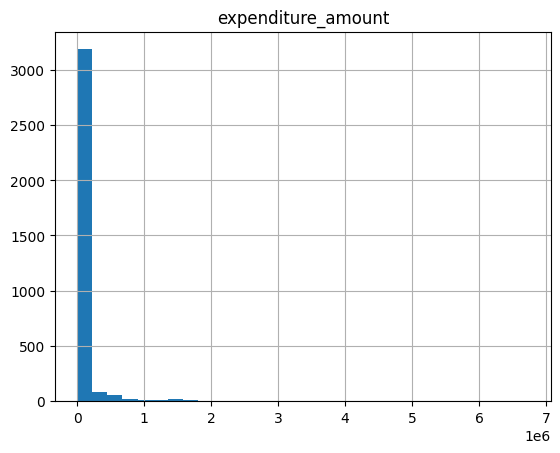

In [11]:
reports_48hr = df[df['report_type'] == 48]
reports_48hr.hist(column='expenditure_amount', bins=30)
reports_48hr['expenditure_amount'].sort_values(ascending=False)

4834    16717500.00
1548     3001406.50
213      1788800.00
7050     1785250.00
456      1785250.00
           ...     
5251           6.72
2579           6.72
4392           0.00
4066      -25018.23
7441     -580000.00
Name: expenditure_amount, Length: 782, dtype: float64

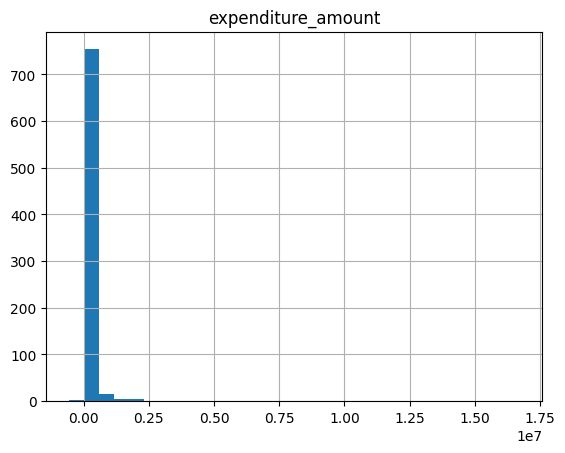

In [12]:
reports_24hr = df[df['report_type'] == 24]
reports_24hr.hist(column='expenditure_amount', bins=30)
reports_24hr['expenditure_amount'].sort_values(ascending=False)

Both distributions appear to be right-skewed, so we can't use something like a chi-squared test.
Let's use a Mann-Whitney U test instead to check if the distributions of expenditure amounts are the same. 

Let alpha = 0.05, 

H0: The distribution of dollar amounts for 24-hour reports is the same as the distribution of dollar amounts for 48-hour reports. 

HA: The distribution of dollar amounts for 24-hour reports is different from the distribution of dollar amounts for 48-hour reports.

In [13]:
res = scipy.stats.mannwhitneyu(reports_24hr['expenditure_amount'], reports_48hr['expenditure_amount'])
res.pvalue

1.069562738372878e-08

## Conclusion 2:
Since the p-value was less than 0.05, we reject the null hypothesis. This means that we can conclude that the distribution of the dollar amounts is different between 24-hour and 48-hour reports.
This would make sense, since the reports have different reporting requirements.

Next, let's investigate what this money is being used for. 

In [14]:
df['category_code_full'].apply(lambda x: x.strip() if not pd.isnull(x) else x)
df['category_code_full'].value_counts()

category_code_full
Advertising Expenses                        2038
Administrative/Salary/Overhead Expenses       31
Solicitation and Fundraising Expenses         16
Campaign Event Expenses                       12
Campaign Materials                             9
Name: count, dtype: int64

While loooking through the data, I noticed a lot of NaN values in the 'category_code_full' column. I wanted to see if I could apply some sort of mode imputation to fix this. For example, if a payee had mostly payments for advertising but some of its expenditures were listed as NaN, I could fill in the missing ones as advertising. But in the vast majority of the cases, either all or none of a payee's expenditures were classified. However, I thought it appropriate to fill in the category code for any payee with 'MEDIA' or 'ADVERTISING' in its name as advertising, since many such payees fit this criteria.

In [15]:
def fill_category_code(row):
    if pd.isnull(row['category_code_full']):
        if any(kw in row['payee_name'] for kw in ['MEDIA', 'ADVERTISING']):
            row['category_code_full'] = 'Advertising Expenses '
    return row

df = df.apply(fill_category_code, axis=1)

df['category_code_full'].value_counts()

category_code_full
Advertising Expenses                        2536
Administrative/Salary/Overhead Expenses       31
Solicitation and Fundraising Expenses         16
Campaign Event Expenses                       12
Campaign Materials                             9
Name: count, dtype: int64

Ok, imputation done. Let's take a look at the box whisker plots for each spending category.

<Axes: title={'center': 'expenditure_amount'}, ylabel='category_code_full'>

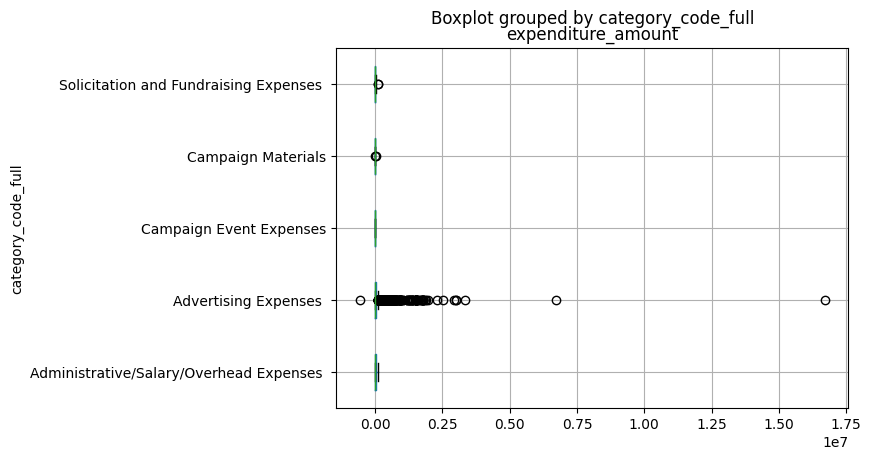

In [16]:
df.boxplot(column='expenditure_amount', by='category_code_full', vert=False)

That's a lot of outliers. Let's not show them so we can actually see what's going on with the plot.

<Axes: title={'center': 'expenditure_amount'}, ylabel='category_code_full'>

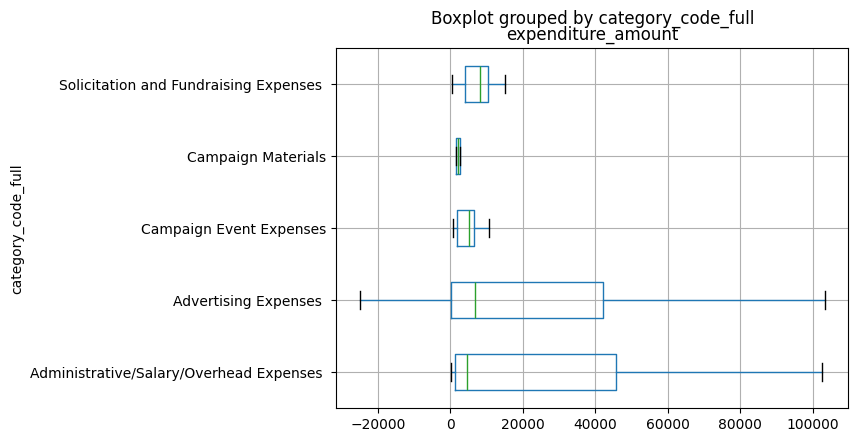

In [17]:
df.boxplot(column='expenditure_amount', by='category_code_full', vert=False, showfliers=False)

That's pretty interesting -- even though there are far more payments listed as Advertising Expenses than anything else, most of the medians of the categories are somewhat similar. Additionally, Advertising and Administrative/Salary/Overhead have pretty similar medians, interquartile ranges, and maximum.

Let's take a look at the means of each -- I'm expecting to see that Advertising has the highest mean by far, judging by the magnitude and number of outliers we saw with the box whisker plot.

In [18]:
df.groupby('category_code_full')['expenditure_amount'].mean().sort_values(ascending=False)

category_code_full
Advertising Expenses                        97063.227906
Administrative/Salary/Overhead Expenses     22549.151935
Solicitation and Fundraising Expenses       18570.125000
Campaign Materials                           5613.490000
Campaign Event Expenses                      4698.080833
Name: expenditure_amount, dtype: float64

As expected, Advertising Expenses had the highest mean.  

Let's take a look at the sum of each category for good measure.

In [19]:
df.groupby('category_code_full')['expenditure_amount'].sum().sort_values(ascending=False)

category_code_full
Advertising Expenses                        2.461523e+08
Administrative/Salary/Overhead Expenses     6.990237e+05
Solicitation and Fundraising Expenses       2.971220e+05
Campaign Event Expenses                     5.637697e+04
Campaign Materials                          5.052141e+04
Name: expenditure_amount, dtype: float64

## Conclusion 3: 

As the count, mean, and sum show, Advertising Expenses dominate the expenditures. According to the findings of [this Reuters article](https://www.reuters.com/world/us/us-political-ad-spending-soar-2024-with-tv-media-biggest-winner-report-2024-01-11/), this would make sense.